<a href="https://colab.research.google.com/github/monsegutier/GRUPO-6-PROC.-DE-DATOS/blob/main/src/crear_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pobreza en Argentina**

En este trabajo se analiza la pobreza en Argentina de acuerdo a los datos de la Encuesta Permanente de Hogares (EPH). Las bases de datos que se toman en este caso son las del último trimestre del año 2022 (últimas disponibles).

De acuerdo a los ingresos de cada hogar y los datos de la canasta básica que proporciona INDEC se puede estimar el porcentaje de pobreza en Argentina.

Para calcular el ingreso del hogar se estima primero el porcentaje correspondiente al adulto equivalente en cada miembro del hogar, según género y edad, siguiendo las equivalencias dispuestas por INDEC (ver Cuadro 4 del archivo canasta_01_23DF5760FF57.pdf)

En este caso, la línea de pobreza para un adulto equivalente fue de $49.358.

Las fuentes de los bases de datos son:


**Bases de datos**

https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos


**Diseño de registro y estructura para las bases**

https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_disenoreg_09.pdf


**Canasta básica alimentaria diciembre 2022**

https://www.indec.gob.ar/uploads/informesdeprensa/canasta_01_23DF5760FF57.pdf



# Importamos las librerías






In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import warnings

warnings.filterwarnings('ignore')

# 1- Recolección y preparación de datos:

## Carga de datos y creacion de Dataframes para trabajar

In [54]:
#cargamos el archivo de individuos "usu_individual_T422.csv"
individuos = 'https://raw.githubusercontent.com/monsegutier/GRUPO-6-PROC.-DE-DATOS/main/data/usu_individual_T422.csv'
# from google.colab import files
# uploaded  = files.upload()

In [55]:
#cargamos el archivo de hogares "usu_hogar_T422.csv"
hogares = 'https://raw.githubusercontent.com/monsegutier/GRUPO-6-PROC.-DE-DATOS/main/data/usu_hogar_T422.csv'
#from google.colab import files
#uploaded  = files.upload()

In [56]:
#creamos el dataframe individuos
#df_individual = pd.read_csv("usu_individual_T422.csv", sep=';')
df_individual = pd.read_csv(individuos, sep=';')

In [57]:
#creamos el dataframe hogares
#df_hogares = pd.read_csv("usu_hogar_T422.csv", sep=";")
df_hogares = pd.read_csv(hogares, sep=";")

## Dataframe checks

In [58]:
#medimos las dimensiones
print("Dimensiones de dataframe individuos:", df_individual.shape)
print("Dimensiones de dataframe hogares:", df_hogares.shape)


Dimensiones de dataframe individuos: (48545, 177)
Dimensiones de dataframe hogares: (16740, 88)


In [59]:
#vemos los primeros registros
display(df_individual.head())
display(df_hogares.head())

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPRUHKMLSCDEGJBF00788920,2022,4,1,2,1,43,S,13,464,...,NaN,12,0.00,12,12.0,12,12.0,NaN,12,0
1,TQRMNORSSHMMMLCDEGJBF00714103,2022,4,1,1,1,43,S,13,532,...,NaN,7,61333.33,6,7.0,6,6.0,NaN,6,635
2,TQRMNORSSHMMMLCDEGJBF00714103,2022,4,1,2,1,43,S,13,532,...,NaN,7,61333.33,6,7.0,6,6.0,NaN,6,635
3,TQRMNORSSHMMMLCDEGJBF00714103,2022,4,1,3,1,43,S,13,532,...,NaN,7,61333.33,6,7.0,6,6.0,NaN,6,635
4,TQRMNORQUHLMLOCDEFPCH00715601,2022,4,1,1,1,44,N,9,348,...,9.0,7,76666.67,7,8.0,6,NaN,8.0,6,341


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOSPYHKOLQCDEGNFJ00789611,2022,4,1,1,44,N,17,356,1,...,NaN,9.0,8,558,1,2,98,0,0,0
1,TQRMNOQXUHMOLQCDEGNFJ00713295,2022,4,1,1,44,N,17,239,1,...,NaN,12.0,12,0,2,0,4,0,0,0
2,TQRMNORRSHJMKMCDEOJAH00794456,2022,4,1,1,44,N,93,40,2,...,NaN,12.0,12,0,1,0,98,0,0,0
3,TQRMNOSVUHLMKNCDEOJAH00720329,2022,4,1,1,44,N,93,95,1,...,NaN,9.0,8,108,1,0,98,0,0,0
4,TQRMNOSQWHJOKNCDEOJAH00794457,2022,4,1,1,44,N,93,89,1,...,NaN,1.0,1,112,1,0,96,0,0,0


## Empezamos a trabajar los datasets

### Metodologia:
segun https://www.indec.gob.ar/ftp/cuadros/sociedad/EPH_metodologia_22_pobreza.pdf


"Dado que las necesidades nutricionales difieren entre la población, se construye una unidad de referencia,
el “adulto equivalente”, correspondiente a un hombre adulto de actividad moderada, para establecer luego
las relaciones en las necesidades energéticas según edad y sexo de las personas. A partir de estas equivalencias se construyen las líneas para cada hogar según su tamaño y composición. En tanto que las líneas se
construyen por hogar, el valor de las canastas que estas suponen debe ser contrastado con el ingreso total
familiar del hogar",
 Lo que permite clasificarlos en hogares pobres o no, segun los ingresos cubren o no la canasta basica de alimentos
  
  Para este analisis se uso https://www.indec.gob.ar/uploads/informesdeprensa/canasta_01_23DF5760FF57.pdf

### Calculo del adulto equivalente
Para integrar los datasets, entonces es necesario calcular el porcentaje de adulto equivalente de cada miembro del hogar, según edad y género, en el dataframe individuos  y luego integrarlo con el dataframe hogares


#### asignamos un % a cada persona que vive en el hogar según género y edad

In [60]:
# le asignamos un % a cada persona que vive en el hogar según género y edad, en la variable 'AE_ctrol_ind'
# ver Cuadro 4 de canasta_01_23DF5760FF57.pdf

condiciones = [
    (df_individual ['CH04'] >= 1) & (df_individual['CH06'] < 1),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 1),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 2),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 3),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 4),
    (df_individual['CH04'] >= 1 ) & ( df_individual['CH06'] == 5),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 6),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 7),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 8),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 9),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] == 10),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] == 11),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] == 12),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 13) & (df_individual['CH06'] <=14),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 15) & (df_individual['CH06'] <=17),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 18) & (df_individual['CH06'] <=29),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 30) & (df_individual['CH06'] <=45),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 46) & (df_individual['CH06'] <=60),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 61) & (df_individual['CH06'] <=75),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] > 75),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==10),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==11),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==12),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==13),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==14),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==15),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==16),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==17),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 18) & (df_individual['CH06'] <=29),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 30) & (df_individual['CH06'] <=45),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 46) & (df_individual['CH06'] <=60),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 61) & (df_individual['CH06'] <=75),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] > 75)
    ]

opciones = [0.35,0.37,0.46,0.51,0.55,0.60,0.64,0.66,0.68,0.69,0.70,0.72,0.74,0.76,0.77,0.76,0.77,0.76,0.67,0.63,0.79,0.82,0.85,0.90,
            0.96,1.00,1.03,1.04,1.02,1.00,1.00,0.83,0.74]



In [61]:
df_individual['AE_ctrol_ind']=np.select(condiciones,opciones)


In [62]:
df_individual.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,AE_ctrol_ind
0,TQRMNOPRUHKMLSCDEGJBF00788920,2022,4,1,2,1,43,S,13,464,...,12,0.00,12,12.0,12,12.0,NaN,12,0,1.02
1,TQRMNORSSHMMMLCDEGJBF00714103,2022,4,1,1,1,43,S,13,532,...,7,61333.33,6,7.0,6,6.0,NaN,6,635,0.83
2,TQRMNORSSHMMMLCDEGJBF00714103,2022,4,1,2,1,43,S,13,532,...,7,61333.33,6,7.0,6,6.0,NaN,6,635,0.67
3,TQRMNORSSHMMMLCDEGJBF00714103,2022,4,1,3,1,43,S,13,532,...,7,61333.33,6,7.0,6,6.0,NaN,6,635,1.00
4,TQRMNORQUHLMLOCDEFPCH00715601,2022,4,1,1,1,44,N,9,348,...,7,76666.67,7,8.0,6,NaN,8.0,6,341,1.00


#### Depuramos y calculamos el % de cada persona en el hogar

In [63]:
#seleccionamos solo las columnas que nos interesan para este estudio (ver archivo "EPH_disenoreg_09 disponible en https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_disenoreg_09.pdf")

df_personas = df_individual[['CODUSU','NRO_HOGAR','CH03','CH04','CH06','CH08','NIVEL_ED','CAT_OCUP','CAT_INAC','AE_ctrol_ind']]

In [64]:
df_personas.head(5)

,CODUSU,NRO_HOGAR,CH03,CH04,CH06,CH08,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind
0,TQRMNOPRUHKMLSCDEGJBF00788920,1,2,1,22,2,4,3,0,1.02
1,TQRMNORSSHMMMLCDEGJBF00714103,1,1,1,73,1,5,0,1,0.83
2,TQRMNORSSHMMMLCDEGJBF00714103,1,2,2,69,1,5,0,1,0.67
3,TQRMNORSSHMMMLCDEGJBF00714103,1,3,1,40,3,1,3,0,1.00
4,TQRMNORQUHLMLOCDEFPCH00715601,1,1,1,58,1,1,3,0,1.00


In [65]:
#sumamos el % de cada persona que compone el hogar (las variables CODUSU y NRO_HOGAR identifican a cada hogar)

df_suma = df_personas.groupby(['CODUSU','NRO_HOGAR']).AE_ctrol_ind.sum()

In [66]:
df_suma.head(5)

CODUSU                         NRO_HOGAR
TQRMNOPPQHJKLLCDEFKID00798130  1            1.50
TQRMNOPPQHJLKUCDEFKID00796257  1            2.00
TQRMNOPPQHJMLOCDEHPJB00795718  1            3.79
TQRMNOPPQHJNLPCDEHJGH00793308  1            4.43
TQRMNOPPQHJNLTCDEFKID00798140  1            2.02
Name: AE_ctrol_ind, dtype: float64

In [67]:
df_suma.shape

(16740,)

#### unimos los dos dataframes

In [68]:
#unimos los dos dataframes según las variables CODUSU y NRO_HOGAR

df_personas_suma = pd.merge(df_personas, df_suma, on=['CODUSU','NRO_HOGAR'])

In [69]:
df_personas_suma.head(5)

,CODUSU,NRO_HOGAR,CH03,CH04,CH06,CH08,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind_x,AE_ctrol_ind_y
0,TQRMNOPRUHKMLSCDEGJBF00788920,1,2,1,22,2,4,3,0,1.02,1.78
1,TQRMNOPRUHKMLSCDEGJBF00788920,1,1,2,24,2,6,3,0,0.76,1.78
2,TQRMNORSSHMMMLCDEGJBF00714103,1,1,1,73,1,5,0,1,0.83,2.50
3,TQRMNORSSHMMMLCDEGJBF00714103,1,2,2,69,1,5,0,1,0.67,2.50
4,TQRMNORSSHMMMLCDEGJBF00714103,1,3,1,40,3,1,3,0,1.00,2.50


In [70]:
#renombramos las columnas

df_personas_suma = df_personas_suma.rename(columns={
     'CH03':'parentesco(CH3)',
     'CH04':'genero(CH04)',
     'CH06':'edad(CH06)',
     'CH08':'cob_medica(CH08)',
     'AE_ctrol_ind_x':'AE_ctrol_ind',
     'AE_ctrol_ind_y':'AE_ctrol_ind_sum'})

In [71]:
df_personas_suma.head(2)

,CODUSU,NRO_HOGAR,parentesco(CH3),genero(CH04),edad(CH06),cob_medica(CH08),NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum
0,TQRMNOPRUHKMLSCDEGJBF00788920,1,2,1,22,2,4,3,0,1.02,1.78
1,TQRMNOPRUHKMLSCDEGJBF00788920,1,1,2,24,2,6,3,0,0.76,1.78


In [72]:
df_personas_suma.shape

(48545, 11)

In [73]:
#seleccionamos solo los que cumplen la condición de jefes/as de hogar

df_personas_jefes = df_personas_suma.loc[df_personas_suma.loc[:, 'parentesco(CH3)'] == 1]

In [74]:
df_personas_jefes.head(5)

,CODUSU,NRO_HOGAR,parentesco(CH3),genero(CH04),edad(CH06),cob_medica(CH08),NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum
1,TQRMNOPRUHKMLSCDEGJBF00788920,1,1,2,24,2,6,3,0,0.76,1.78
2,TQRMNORSSHMMMLCDEGJBF00714103,1,1,1,73,1,5,0,1,0.83,2.50
5,TQRMNORQUHLMLOCDEFPCH00715601,1,1,1,58,1,1,3,0,1.00,2.78
8,TQRMNOQWXHLMNOCDEIJAH00719609,2,1,1,31,4,3,3,0,1.00,4.10
13,TQSMNORXSHKLMUCDEIJAH00794113,1,1,1,49,4,5,2,0,1.00,4.33


In [75]:
#comprobamos la cantidad de filas

df_personas_jefes.shape

(16740, 11)

In [76]:
#exportamos el dataframe como .csv
df_personas_jefes.to_csv('df_personas_jefes.csv', sep=';', index=False)

In [77]:
#comprobamos la cantidad de filas

df_hogares.shape

(16740, 88)

Vemos que la cantidad de filas coincide con la del dataframe df_personas_jefes


In [78]:
#unimos los dos dataframes, que tienen la misma cantidad de filas, según las variables CODUSU y NRO_HOGAR

df_dataset = pd.merge(df_hogares, df_personas_jefes, on=['CODUSU','NRO_HOGAR'])

In [79]:
#comprobamos la cantidad de filas

df_dataset.shape

(16740, 97)

In [80]:
df_dataset.head(2)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,VII2_4,parentesco(CH3),genero(CH04),edad(CH06),cob_medica(CH08),NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum
0,TQRMNOSPYHKOLQCDEGNFJ00789611,2022,4,1,1,44,N,17,356,1,...,0,1,1,46,4,3,2,0,1.00,3.15
1,TQRMNOQXUHMOLQCDEGNFJ00713295,2022,4,1,1,44,N,17,239,1,...,0,1,1,69,1,2,0,1,0.83,3.93


In [81]:
#la variable ITF representa el monto de ingreso total familiar (ver archivo "EPH_disenoreg_09 disponible en https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_disenoreg_09.pdf")
#a este monto lo dividimos por la suma de % de las personas que residen en el hogar para obtener el ingreso por adulto equivalente

df_dataset['adulto_equivalente']= df_dataset.apply(lambda row: row.ITF/row.AE_ctrol_ind_sum, axis=1)

In [82]:
df_dataset['adulto_equivalente']= round(df_dataset['adulto_equivalente'], 2)

In [83]:
df_dataset.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,parentesco(CH3),genero(CH04),edad(CH06),cob_medica(CH08),NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum,adulto_equivalente
0,TQRMNOSPYHKOLQCDEGNFJ00789611,2022,4,1,1,44,N,17,356,1,...,1,1,46,4,3,2,0,1.00,3.15,126984.13
1,TQRMNOQXUHMOLQCDEGNFJ00713295,2022,4,1,1,44,N,17,239,1,...,1,1,69,1,2,0,1,0.83,3.93,0.00
2,TQRMNORRSHJMKMCDEOJAH00794456,2022,4,1,1,44,N,93,40,2,...,1,2,49,1,6,3,0,0.76,3.82,0.00
3,TQRMNOSVUHLMKNCDEOJAH00720329,2022,4,1,1,44,N,93,95,1,...,1,2,76,1,3,0,1,0.63,0.63,146031.75
4,TQRMNOSQWHJOKNCDEOJAH00794457,2022,4,1,1,44,N,93,89,1,...,1,2,44,1,6,3,0,0.77,2.56,19531.25


#### Creamos la variable objetivo: Nivel de Pobreza

In [84]:
#creamos la variable objetivo, pobreza

"""
De acuerdo con el archivo "canasta_01_23DF5760FF57" (disponible en https://www.indec.gob.ar/uploads/informesdeprensa/canasta_01_23DF5760FF57.pdf)
la canasta básica total para un adulto equivalente, para que no ingrese en la línea de pobreza, es de $49.6358.

Creamos la varibale pobreza, donde todos los hogares que tengan ingresos menores a este valor son pobres.
"""

df_dataset['pobreza'] = np.where(df_dataset['adulto_equivalente']<49358,1,0)


In [85]:
df_dataset['pobreza'].value_counts()

1    8549
0    8191
Name: pobreza, dtype: int64

In [86]:
df_dataset.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,genero(CH04),edad(CH06),cob_medica(CH08),NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum,adulto_equivalente,pobreza
0,TQRMNOSPYHKOLQCDEGNFJ00789611,2022,4,1,1,44,N,17,356,1,...,1,46,4,3,2,0,1.00,3.15,126984.13,0
1,TQRMNOQXUHMOLQCDEGNFJ00713295,2022,4,1,1,44,N,17,239,1,...,1,69,1,2,0,1,0.83,3.93,0.00,1
2,TQRMNORRSHJMKMCDEOJAH00794456,2022,4,1,1,44,N,93,40,2,...,2,49,1,6,3,0,0.76,3.82,0.00,1
3,TQRMNOSVUHLMKNCDEOJAH00720329,2022,4,1,1,44,N,93,95,1,...,2,76,1,3,0,1,0.63,0.63,146031.75,0
4,TQRMNOSQWHJOKNCDEOJAH00794457,2022,4,1,1,44,N,93,89,1,...,2,44,1,6,3,0,0.77,2.56,19531.25,1


In [87]:
df_dataset.to_csv('dataset.csv')

In [88]:
#la variable ITF representa el monto de ingreso total familiar
#analizamos si hay valores 0 en la variable ITF
ITF_cero = [x for x in df_dataset['ITF'] if x == 0]
len(ITF_cero)

3739

In [89]:
#hay 3.739 hogares que declararon ingresos $0, para este estudio no los vamos a tener en cuenta
#creamos un nuevo dataframe sin esos valores

df_dataset_sinITF0 = df_dataset.drop(df_dataset[df_dataset['ITF']==0].index)

In [90]:
ITF_cero = [x for x in df_dataset_sinITF0['ITF'] if x == 0]
len(ITF_cero)

0

### Calculo del indice de Pobreza en los *relevamientos*

In [91]:
# Calculamos el porcentaje de pobreza
# Contar los valores únicos en la columna 'pobreza'
counts = df_dataset_sinITF0['pobreza'].value_counts()

In [92]:
# Porcentaje de pobreza
porcentaje_pobreza = counts[1] / len(df_dataset_sinITF0) * 100

print(f'El porcentaje de pobreza es {porcentaje_pobreza:.2f}%')

El porcentaje de pobreza es 37.00%


### Exportamos para analizar los hogares bajo la linea de pobreza

In [93]:
#seleccionamos los hogares que están por debajo de la línea de pobreza
df_pobres = df_dataset_sinITF0[df_dataset_sinITF0['pobreza'] == 1]

In [94]:
df_pobres.to_csv('dataset_hblp.csv')

# 2 - Análisis exploratorio de datos:
Analizamos variables en general y posibles correlaciones que valga la pena explorar

## exploramos el dataframe

In [95]:
## cargamos el archivo csv generado en el punto anterior y creamos el dataset "hblp" (hogares bajo linea de pobreza)


hblp = 'https://raw.githubusercontent.com/monsegutier/GRUPO-6-PROC.-DE-DATOS/main/data/dataset_hblp.csv'
df_hblp = pd.read_csv(hblp, sep=',')

## dataframe checks

print("Dimensiones de dataframe hblp:", df_hblp.shape)
display(df_hblp.head())

#columnas del dataframe
#print(df_hblp.columns)


# Obtener la info de una fila determinada
# x_row = df_hblp.iloc[5]

# Iterar sobre las columnas y sus valores de la primera fila
#for column_name, value in x_row.iteritems():
#    print(f"{column_name}: {value}")

Dimensiones de dataframe hblp: (4810, 100)


,Unnamed: 0,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,...,genero(CH04),edad(CH06),cob_medica(CH08),NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum,adulto_equivalente,pobreza
0,4,TQRMNOSQWHJOKNCDEOJAH00794457,2022,4,1,1,44,N,93,89,...,2,44,1,6,3,0,0.77,2.56,19531.25,1
1,6,TQRMNOQVSHKMKPCDEOJAH00793041,2022,4,1,1,44,N,93,99,...,1,45,4,3,2,0,1.00,3.55,22535.21,1
2,7,TQRMNOQPXHKKKQCDEOJAH00793105,2022,4,1,1,44,N,93,138,...,2,51,1,6,3,0,0.76,2.55,47058.82,1
3,11,TQRMNOQTYHLMKRCDEFLID00714984,2022,4,1,1,43,S,5,359,...,2,80,1,2,0,1,0.63,1.46,31506.85,1
4,18,TQRMNORVPHMMTRCDEIJAH00719603,2022,4,1,1,1,S,33,1410,...,1,52,1,3,3,0,1.00,4.10,39024.39,1


## Analizamos datos generales

Rango Ingresos: 426376
Valor máximo Ingresos: 426776
Valor mínimo Ingresos: 400
Varianza: 2801765309.791868
Media: 96186.08877338878
Moda: 80000
Primer cuartil (25%): 58000.0
Segundo cuartil (50%): 89000.0
Tercer cuartil (75%): 125000.0


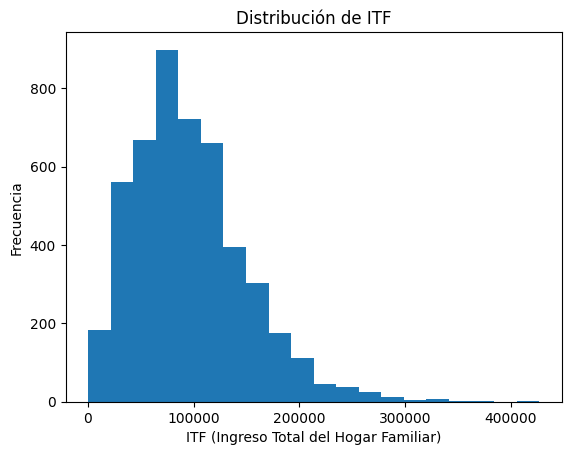

In [96]:
# Maximo, minimo y rango de Ingresos de los hogares bajo linea de pobreza
range_itf = df_hblp['ITF'].max() - df_hblp['ITF'].min()
max_itf = df_hblp['ITF'].max()
min_itf = df_hblp['ITF'].min()

# Calcular la varianza
variance = df_hblp['ITF'].var()

# Calcular la media
mean = df_hblp['ITF'].mean()

# Calcular la moda
mode = df_hblp['ITF'].mode().values[0]

# Calcular los cuartiles de la variable "ITF"
q1 = df_hblp['ITF'].quantile(0.25)
q2 = df_hblp['ITF'].quantile(0.50)
q3 = df_hblp['ITF'].quantile(0.75)



# Imprimir los resultados
print("Rango Ingresos:", range_itf)
print("Valor máximo Ingresos:", max_itf)
print("Valor mínimo Ingresos:", min_itf)
print("Varianza:", variance)
print("Media:", mean)
print("Moda:", mode)
print("Primer cuartil (25%):", q1)
print("Segundo cuartil (50%):", q2)
print("Tercer cuartil (75%):", q3)



# Graficar un histograma de la columna ITF
plt.hist(df_hblp['ITF'], bins=20)
plt.xlabel('ITF (Ingreso Total del Hogar Familiar)')
plt.ylabel('Frecuencia')
plt.title('Distribución de ITF')
plt.show()

- los ingresos x hogar varian entre  400 y 426776
- acompañando el dato anterior, el valor alto de varianza sugiere que los ingresos totales del hogar familiar están dispersos en un rango amplio dentro del dataset
- en promedio, el ingreso total del hogar familiar es de aproximadamente 96,186.08
- 80,000 es el más común entre los ingresos totales del hogar familiar en el conjunto de datos
- El 25% de los ingresos se sitúa por debajo de 58000, el 50% se sitúa por debajo de 89000 y el 75% se sitúa por debajo de $125000

## Edad y genero de los jefxs de hogar

### analisis de variables

        edad(CH06)  genero(CH04)            ITF
count  4810.000000   4810.000000    4810.000000
mean     46.761954      1.488358   96186.088773
std      14.438391      0.499916   52931.704203
min      17.000000      1.000000     400.000000
25%      36.000000      1.000000   58000.000000
50%      45.000000      1.000000   89000.000000
75%      57.000000      2.000000  125000.000000
max      95.000000      2.000000  426776.000000


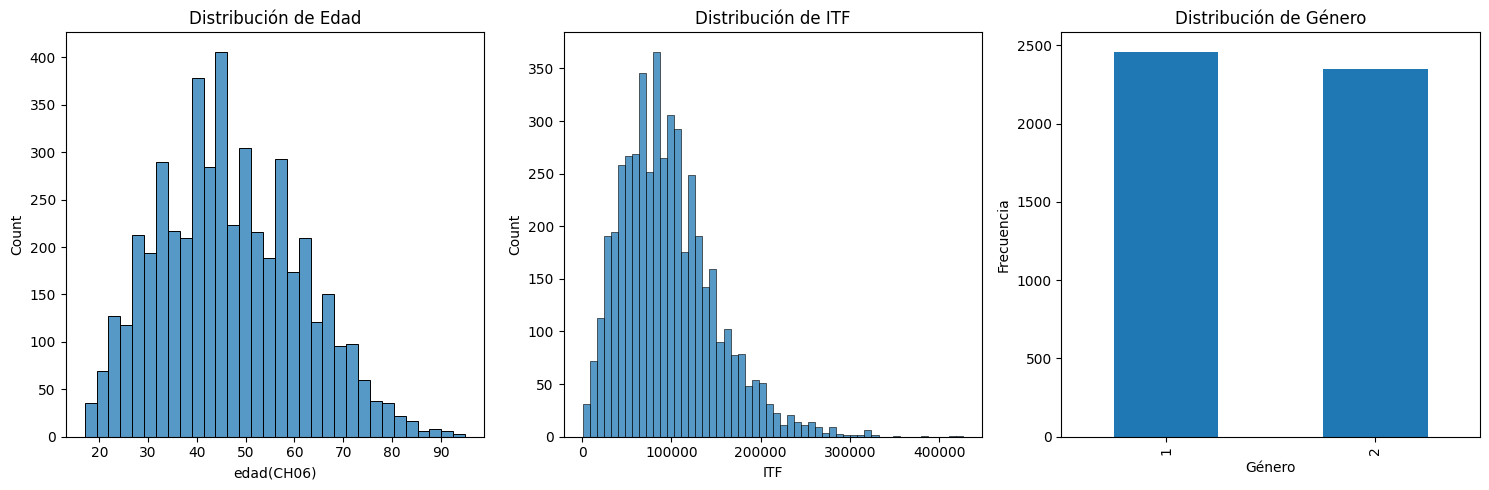

In [97]:
# Seleccionar las columnas relevantes e indicadores basicos
df_subset = df_hblp[['edad(CH06)', 'genero(CH04)']]
print(df_hblp[['edad(CH06)', 'genero(CH04)', 'ITF']].describe())


# Crear una figura y subfiguras en una cuadrícula de 1 fila y 3 columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Gráfico de distribución de edad
sns.histplot(data=df_hblp, x='edad(CH06)', ax=axes[0])
axes[0].set_title('Distribución de Edad')

# Gráfico de distribución de Ingresos totales por hogar
sns.histplot(data=df_hblp, x='ITF', ax=axes[1])
axes[1].set_title('Distribución de ITF')

# Gráfico de distribución de género
gender_counts = df_hblp['genero(CH04)'].value_counts()
gender_counts.plot(kind='bar', ax=axes[2])
axes[2].set_xlabel('Género')
axes[2].set_ylabel('Frecuencia')
axes[2].set_title('Distribución de Género')

# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()



### correlacion entre genero, edad e ingresos totales del hogar

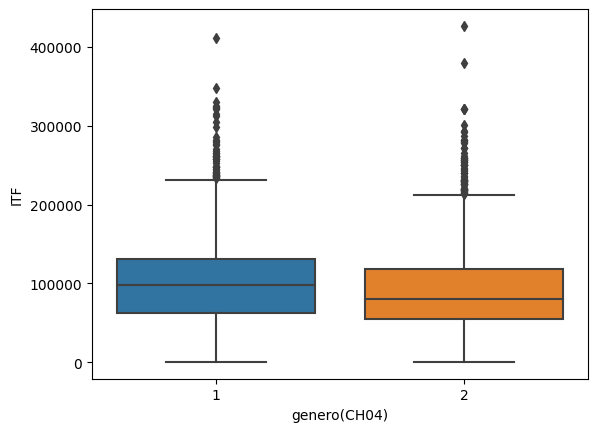

              edad(CH06)  genero(CH04)       ITF
edad(CH06)      1.000000     -0.013363  0.156402
genero(CH04)   -0.013363      1.000000 -0.099347
ITF             0.156402     -0.099347  1.000000


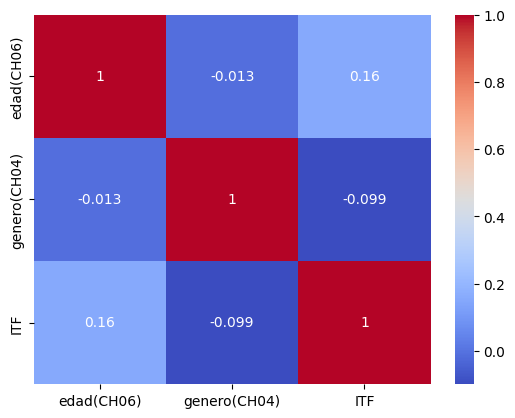

In [98]:

# Gráfico de distribución de ITF según el género
sns.boxplot(data=df_hblp, x='genero(CH04)', y='ITF')
plt.show()

correlation_matrix = df_hblp[['edad(CH06)', 'genero(CH04)', 'ITF']].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()






## comparación del promedio de ingresos entre conglomerados

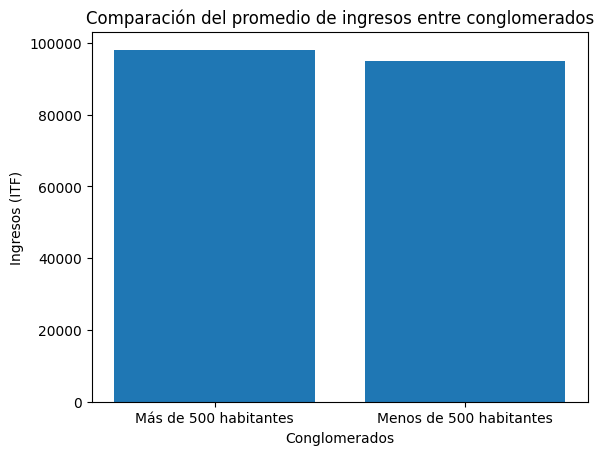

In [105]:
# Filtrar los datos para los conglomerados con más de 500 habitantes
grupo_mas_500 = df_hblp[df_hblp['MAS_500'] == 'S']

# Filtrar los datos para los conglomerados con menos de 500 habitantes
grupo_menos_500 = df_hblp[df_hblp['MAS_500'] == 'N']
# Calcular la media de los ingresos para cada grupo
media_ingresos_mas_500 = grupo_mas_500['ITF'].mean()
media_ingresos_menos_500 = grupo_menos_500['ITF'].mean()

# Crear una lista con los valores de ingresos para cada grupo
ingresos = [media_ingresos_mas_500, media_ingresos_menos_500]

# Crear una lista con las etiquetas de los grupos
etiquetas = ['Más de 500 habitantes', 'Menos de 500 habitantes']

# Crear el gráfico de barras comparativo
plt.bar(etiquetas, ingresos)
plt.xlabel('Conglomerados')
plt.ylabel('Ingresos (ITF)')
plt.title('Comparación del promedio de ingresos entre conglomerados')
plt.show()

## Conclusiones

Según el análisis de correlación realizado entre las variables "edad(CH06)", "genero(CH04)" e "ITF", se pueden inferir que, para los datos relevados, no existe una relacion significativa. De igual manera, tampoco se puede apreciar una relación entre las variables conglomerado e ingresos de los hogares.  




# 3 - 4 Procesamiento, Visualizacion y análisis de datos:

## Realizamos graficos para ver como estan distribuidos los hogares segun la region de residencia

Text(0, 0.5, 'Cant hogares que están debajo de la línea de pobreza')

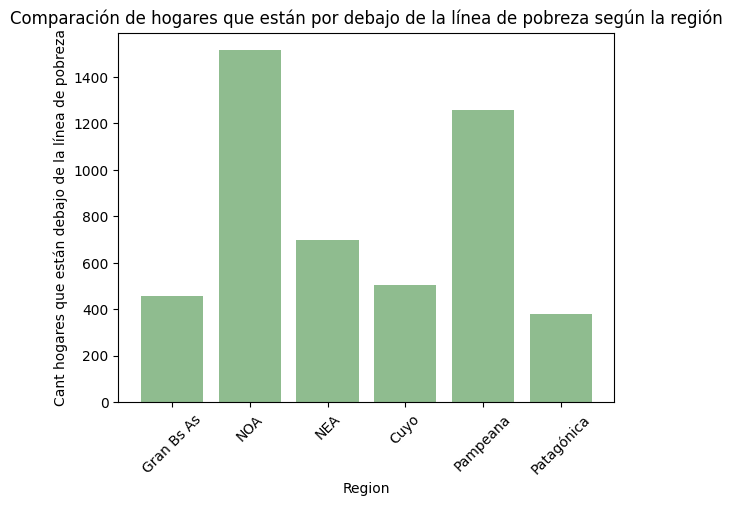

In [99]:
#grafico para observar la cantidad de hogares pobres en  cada region que se realiza la encuesta,
x= sorted(df_hblp ['REGION'].unique()) #indicamos que variable se utiliza en el eje X, sorted me ordena en forma ascendente
etiquetas = ["Gran Bs As","NOA","NEA","Cuyo","Pampeana","Patagónica"] #etiquetas es para nombrar cada region en el eje
alturas = df_hblp .groupby('REGION')['pobreza'].sum() # indicamos cual es la variable que se utiliza en el eje y

# Crear el gráfico de barras
plt.bar(range(len(x)), alturas, color = "darkseagreen") #con range(len()) indicamos que nuestra variable es categorica

# Personalizar los ejes
plt.xticks(range(len(x)), etiquetas,rotation=45) #indicamos que nombre le pone a las columnas

plt.title('Comparación de hogares que están por debajo de la línea de pobreza según la región')
plt.xlabel('Region')
plt.ylabel('Cant hogares que están debajo de la línea de pobreza')

Text(0.5, 0, 'Cant hogares que están debajo de la línea de pobreza')

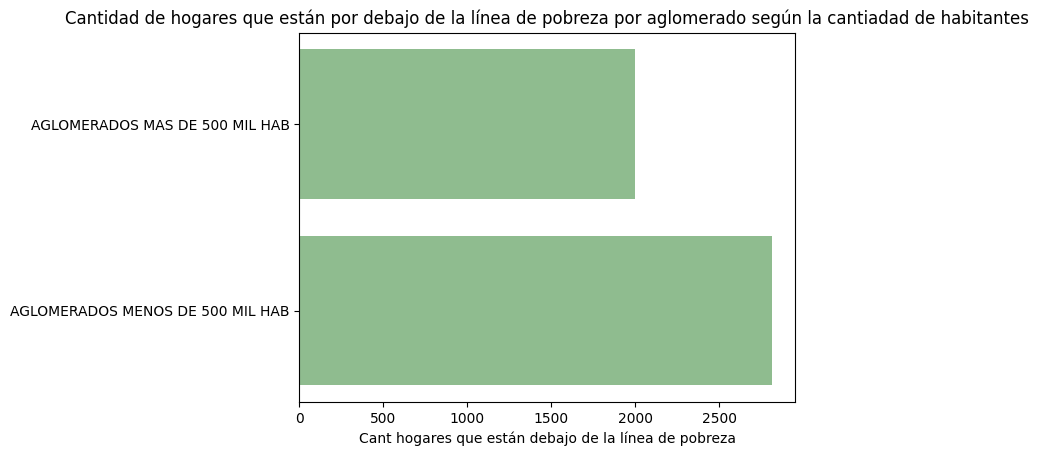

In [100]:
x = sorted (df_hblp ['MAS_500'].unique())
etiquetas = ["AGLOMERADOS MENOS DE 500 MIL HAB","AGLOMERADOS MAS DE 500 MIL HAB"]
alturas = df_hblp .groupby('MAS_500')['pobreza'].sum()
plt.barh(x, alturas, tick_label = etiquetas, color = "darkseagreen")
plt.title('Cantidad de hogares que están por debajo de la línea de pobreza por aglomerado según la cantiadad de habitantes')
plt.xlabel('Cant hogares que están debajo de la línea de pobreza')

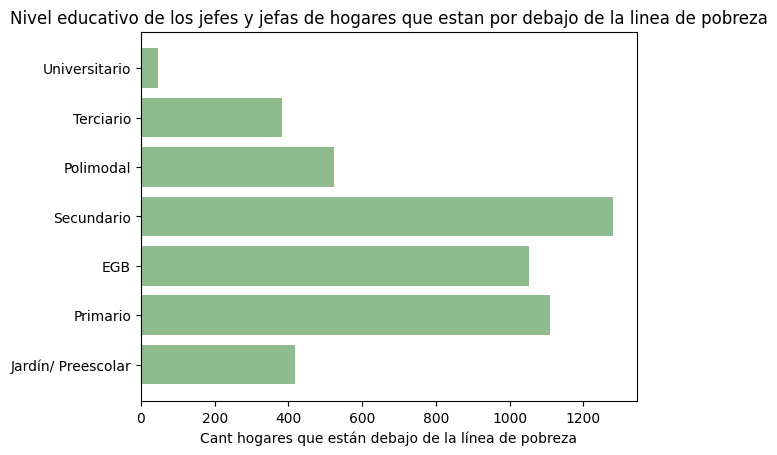

In [101]:
x = sorted (df_hblp ['NIVEL_ED'].unique())
etiquetas =["Jardín/ Preescolar","Primario","EGB","Secundario","Polimodal","Terciario","Universitario" ]# Posgrado Univ y Educación especial (discapacitado) son 0
alturas = df_hblp .groupby('NIVEL_ED')['pobreza'].sum()

plt.barh(x, alturas,tick_label = etiquetas, color = "darkseagreen")
plt.title('Nivel educativo de los jefes y jefas de hogares que estan por debajo de la linea de pobreza')
plt.xlabel('Cant hogares que están debajo de la línea de pobreza')

plt.show()

[1, 2, 3, 4, 9, 12, 13]
cob_medica(CH08)
1     2558
2       80
3      161
4     1985
9        2
12      22
13       2
Name: pobreza, dtype: int64


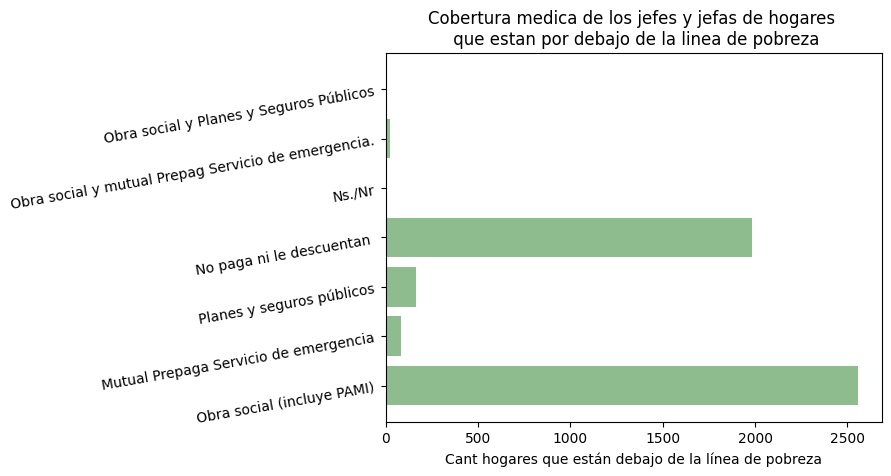

In [102]:
x = sorted (df_hblp ['cob_medica(CH08)'].unique())
print(x)
etiquetas = ["Obra social (incluye PAMI)","Mutual Prepaga Servicio de emergencia","Planes y seguros públicos","No paga ni le descuentan ","Ns./Nr",
             "Obra social y mutual Prepag Servicio de emergencia."," Obra social y Planes y Seguros Públicos"]
alturas = df_hblp .groupby('cob_medica(CH08)')['pobreza'].sum()
print(alturas)

plt.barh(range(len(x)), alturas, tick_label = etiquetas, color = "darkseagreen",)
plt.yticks(range(len(x)), etiquetas,rotation=10)
plt.title('Cobertura medica de los jefes y jefas de hogares \n que estan por debajo de la linea de pobreza')
plt.xlabel('Cant hogares que están debajo de la línea de pobreza')
plt.show()


# 5 - Comunicación efectiva de resultados: